<a href="https://colab.research.google.com/github/sosweetcelestia/heart_disease_prediction/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
# Displaying descriptive information
print("Descriptive Information of Diabetes Dataset:")
print(df.describe())

Descriptive Information of Diabetes Dataset:
             preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
7


Covariance Matrix:
           preg         plas        pres        skin          insu  \
preg  11.354056    13.947131    9.214538   -4.390041    -28.555231   
plas  13.947131  1022.248314   94.430956   29.239183   1220.935799   
pres   9.214538    94.430956  374.647271   64.029396    198.378412   
skin  -4.390041    29.239183   64.029396  254.473245    802.979941   
insu -28.555231  1220.935799  198.378412  802.979941  13281.180078   
mass   0.469774    55.726987   43.004695   49.373869    179.775172   
pedi  -0.037426     1.454875    0.264638    0.972136      7.066681   
age   21.570620    99.082805   54.523453  -21.381023    -57.143290   

            mass      pedi         age  
preg    0.469774 -0.037426   21.570620  
plas   55.726987  1.454875   99.082805  
pres   43.004695  0.264638   54.523453  
skin   49.373869  0.972136  -21.381023  
insu  179.775172  7.066681  -57.143290  
mass   62.159984  0.367405    3.360330  
pedi    0.367405  0.109779    0.130772  
age     3.360330  0.1

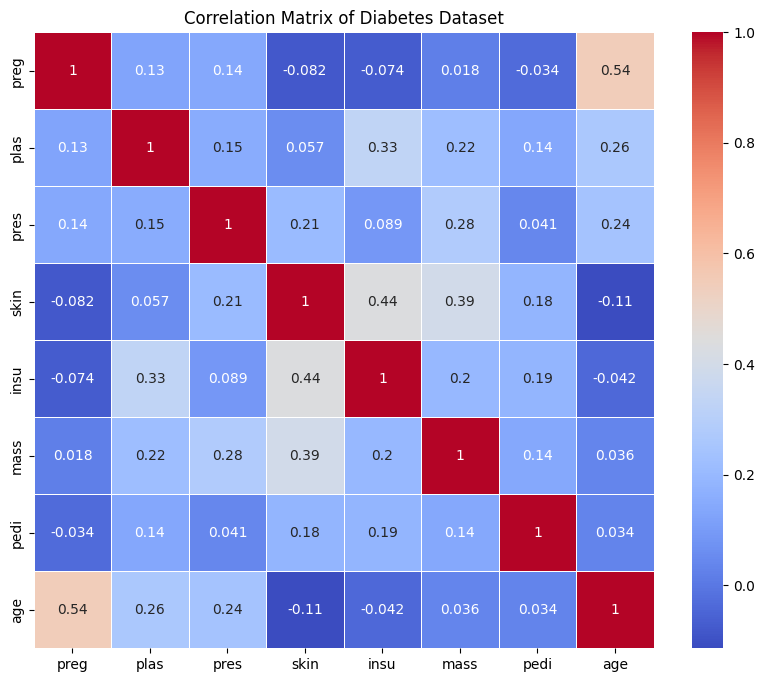

In [5]:
# Exclude non-numeric column
numeric_df = df.drop(columns=['class'])

# Covariance matrix
cov_matrix = numeric_df.cov()
print("\nCovariance Matrix:")
print(cov_matrix)

# Correlation matrix
corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['class'])
y = df['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing classifiers
logistic_reg = LogisticRegression()
svm_classifier = SVC()
random_forest = RandomForestClassifier()

# Training the models
logistic_reg.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Making predictions
logistic_reg_preds = logistic_reg.predict(X_test)
svm_preds = svm_classifier.predict(X_test)
random_forest_preds = random_forest.predict(X_test)

# Evaluating model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_reg_preds))
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_preds))

# Classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_reg_preds))

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_preds))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, random_forest_preds))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7467532467532467
SVM Accuracy: 0.7662337662337663
Random Forest Accuracy: 0.7467532467532467

Logistic Regression Classification Report:
                 precision    recall  f1-score   support

tested_negative       0.81      0.79      0.80        99
tested_positive       0.64      0.67      0.65        55

       accuracy                           0.75       154
      macro avg       0.73      0.73      0.73       154
   weighted avg       0.75      0.75      0.75       154


SVM Classification Report:
                 precision    recall  f1-score   support

tested_negative       0.78      0.88      0.83        99
tested_positive       0.72      0.56      0.63        55

       accuracy                           0.77       154
      macro avg       0.75      0.72      0.73       154
   weighted avg       0.76      0.77      0.76       154


Random Forest Classification Report:
                 precision    recall  f1-score   support

tested_negative  